## Explore fits spectra from Calspec
============================================

- author : Sylvie Dagoret-Campagne
- creation date January 12th 2017

The purpose is to view the spectrum of the stars measured in CTIO 
Location from where the fits file can be downloaded

ftp://ftp.stsci.edu/cdbs/current_calspec/


In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [182]:
from astropy.io import fits

In [183]:
import os

In [184]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#### Specify the path of input

In [185]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016'

#### Specify the list of input file you have

In [186]:
filelist=['hd38949_stis_003.fits','hd60753_stis_003.fits','hd185975_stis_003.fits','hd37962_stis_003.fits']

#### Build the list of fullfilename

In [187]:
fullfilename = [ os.path.join(path,file) for file in filelist]

In [188]:
NBSPECTRA=len(fullfilename )

In [189]:
fullfilename[:]

['/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd38949_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd60753_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd185975_stis_003.fits',
 '/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd37962_stis_003.fits']

Get the object name from the filename.
Regular expressions are used

#### Get the object name from the filename

In [190]:
object_names = [re.findall('^(hd[0-9][0-9][0-9][0-9][0-9])*',file)[0] for file in filelist]

In [191]:
object_names

['hd38949', 'hd60753', 'hd18597', 'hd37962']

#### Select One file

In [192]:
index=3 # set the index you want

In [193]:
object_name=object_names[index]

#### Open the fits file

In [194]:
hdulist=fits.open(fullfilename[0])

In [195]:
hdulist.info()

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/hd38949_stis_003.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      71   ()      
  1  SCI         BinTableHDU     39   3740R x 7C   [1D, 1E, 1E, 1E, 1E, 1I, 1E]   


#### Primary extension of fits file

In [196]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-05T21:03:04' / Date FITS file was generated                  
IRAF-TLM= '2015-01-05T21:03:08' / Time of last modification                     
TARGETID= 'HD38949 '           /                                                
DBTABLE = 'CRSPECTRUM'         /                                                
MAPKEY  = 'CALSPEC '           /                                                
AIRMASS =              0.00000 /Mean airmass of the observation                 
DESCRIP = 'Standard star flux with a new STIS calibration-------' /             
SOURCE  = 'Flux scale of Boh

In [197]:
print hdulist[0].header.keys()

['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'TARGETID', 'DBTABLE', 'MAPKEY', 'AIRMASS', 'DESCRIP', 'SOURCE', 'SOURCE2', 'USEAFTER', 'COMMENT', 'PEDIGREE', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'HISTORY', 'FILENAME', 'WMIN', 'WMAX', '', '', '', '', '', '', '', '', '', '', '', '']


####  Secondary extension of fits file

In [198]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Written by IDL:  Wed Dec 24 09:05:47 2014       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   30 /Number of bytes per row                         
NAXIS2  =                 3740 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    7 /Number of columns                               
EXTNAME = 'SCI     '           /                                                
EXTVER  =                    1 /                                                
INHERIT =                    T /                                                
TFORM1  = '1D      '           /Real*8 (double precision)                       
TTYPE1  = 'WAVELENGTH'      

## Extract Data

In [199]:
table_data=hdulist[1].data

In [200]:
wavelength=table_data['WAVELENGTH'] # in Angstrom

In [201]:
table_data.columns  # shows the columns names of the table

ColDefs(
    name = 'WAVELENGTH'; format = '1D'; unit = 'ANGSTROMS'; disp = 'G10.4'
    name = 'FLUX'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'STATERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'SYSERROR'; format = '1E'; unit = 'FLAM'; disp = 'E12.4'
    name = 'FWHM'; format = '1E'; unit = 'ANGSTROMS'; disp = 'G6.2'
    name = 'DATAQUAL'; format = '1I'; unit = 'NONE'; disp = 'I2'
    name = 'TOTEXP'; format = '1E'; unit = 'SEC'; disp = 'G10.2'
)

In [202]:
wavelengths=table_data.field('WAVELENGTH')/10.

In [203]:
fluxes=table_data.field('FLUX')

## Plot display  parameters

In [204]:
ymax=fluxes.max()*1.1  # Min and Max in vertical
ymin=fluxes.min()

In [205]:
wl_O2Aline=759.37      # Balmer Lines
wl_O2Bline=686.719
wl_Haline=656.281 
wl_Hbline=486.134
wl_Hgline=434.047 
wl_Hdline=410.175
wl_Heline=397.0


## Simple plot

SED_hd37962.pdf


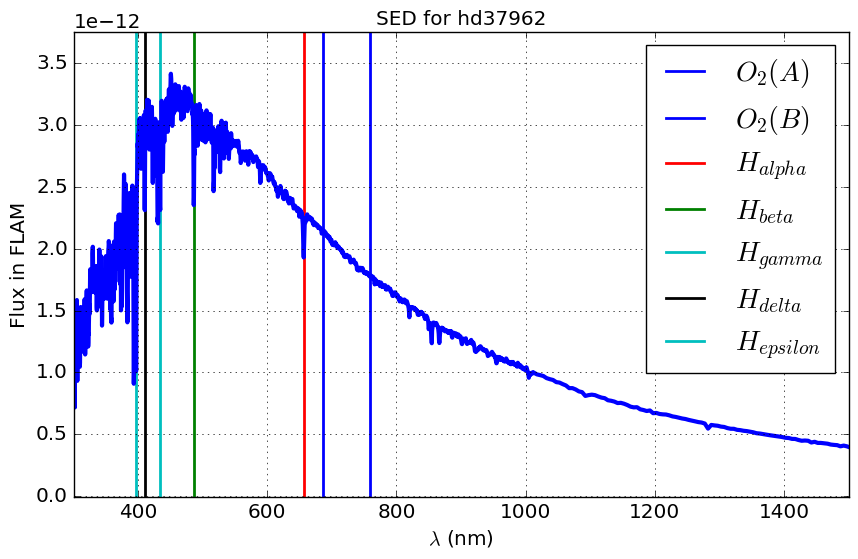

In [206]:
plt.figure(figsize=(10.,6.))
plt.plot(wavelengths,fluxes)
title='SED for {}'.format(object_name)
figfilename='SED_{}'.format(object_name)+'.pdf'
print figfilename
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Flux in FLAM')
plt.title(title)
plt.xlim(300,1500.)
plt.ylim(ymin,ymax)
plt.grid(True)

plt.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=2)
plt.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=2)
plt.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=2)
plt.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=2)
plt.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=2)
plt.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=2)
plt.plot([wl_Heline,wl_Heline],[ymin,ymax],'c-',label='$H_{epsilon}$',lw=2)

plt.plot(wavelengths,fluxes,'b-',lw=3)
plt.legend(loc='best',fontsize=20)

plt.savefig(figfilename)

## Plot with more fine grid

SED_hd37962_v2.pdf


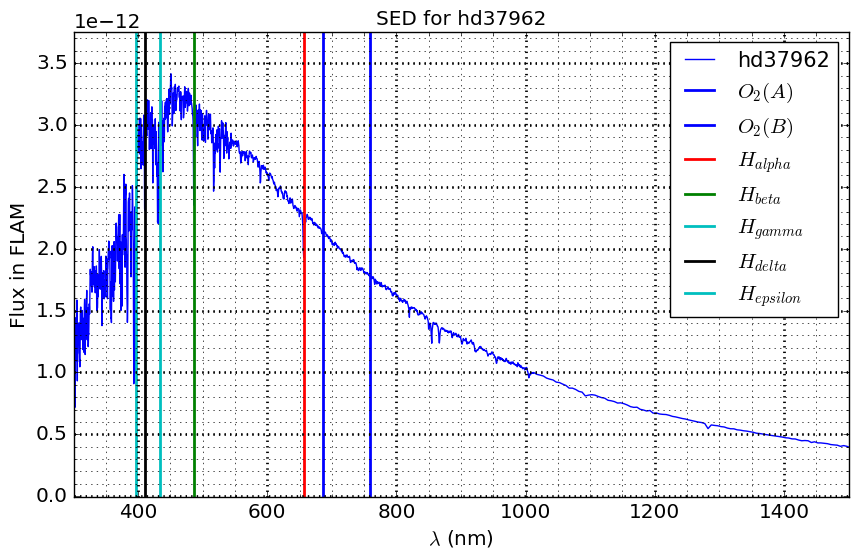

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(wavelengths,fluxes,label=object_name)
title='SED for {}'.format(object_name)
figfilename='SED_{}_v2'.format(object_name)+'.pdf'
print figfilename
ax.set_xlabel('$\lambda$ (nm)')
ax.set_ylabel('Flux in FLAM')
ax.set_title(title)
ax.set_xlim(300,1500.)
ax.set_ylim(ymin,ymax)
plt.grid(True)

ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=2)
ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=2)
ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=2)
ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=2)
ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=2)
ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=2)
ax.plot([wl_Heline,wl_Heline],[ymin,ymax],'c-',label='$H_{epsilon}$',lw=2)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.legend(loc='best',fontsize=15)